In [ ]:
## Plot of histogram of the integral results calculated for each frequency bands and the normalized Mann-Whitney statistic.
#There is the comparison between the results obtained for epileptic and not epiletpic channel and in the
#same frequency range the comparison between the results obtained using the non-overlapping method and the Welch method. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import math
import os 
from scipy.stats import ttest_ind


Numero di dati in risultati_int_alpha.csv: 171


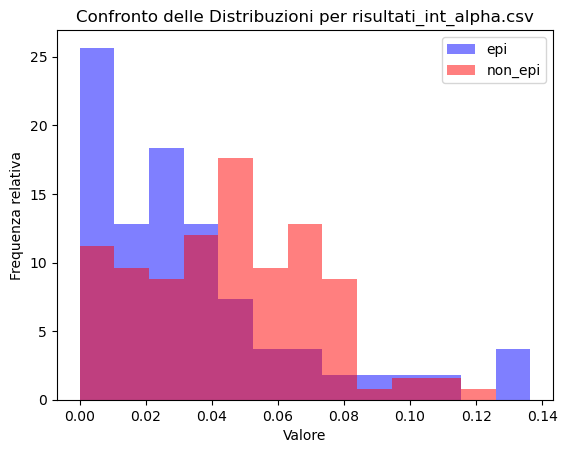

Statistica U normalizzata per risultati_int_alpha.csv: 0.34615384615384615
P-value per risultati_int_alpha.csv: 0.0013986942145323578
Cohen's d per risultati_int_alpha.csv: -0.37607388768899336
Numero di dati in risultati_int_beta.csv: 171


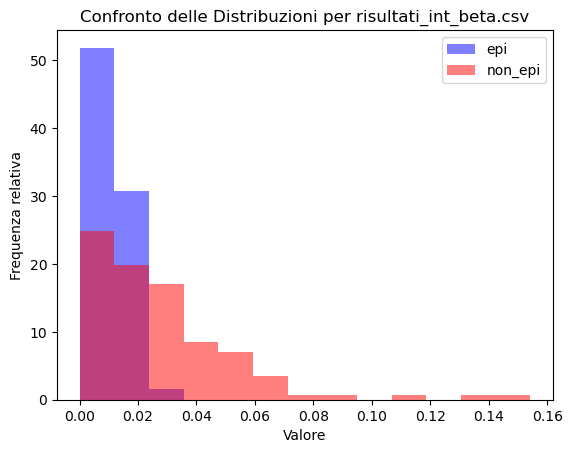

Statistica U normalizzata per risultati_int_beta.csv: 0.2705235940530058
P-value per risultati_int_beta.csv: 1.8758598124096667e-06
Cohen's d per risultati_int_beta.csv: -0.9057116575911167
Numero di dati in risultati_int_delta.csv: 171


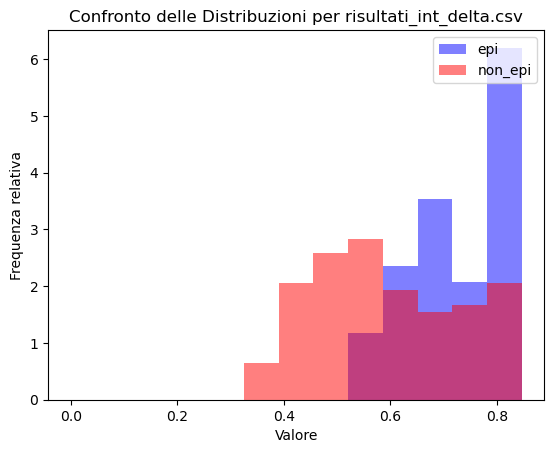

Statistica U normalizzata per risultati_int_delta.csv: 0.7881383322559793
P-value per risultati_int_delta.csv: 2.160853655705372e-09
Cohen's d per risultati_int_delta.csv: 1.1954198306079662
Numero di dati in risultati_int_gamma1.csv: 171


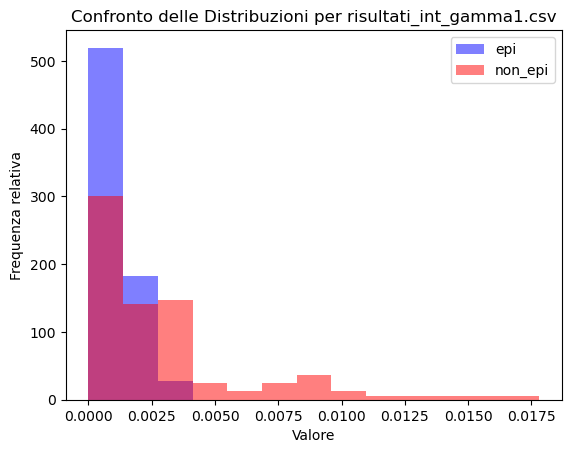

Statistica U normalizzata per risultati_int_gamma1.csv: 0.3159340659340659
P-value per risultati_int_gamma1.csv: 0.00013193205434782376
Cohen's d per risultati_int_gamma1.csv: -0.7912426507169704
Numero di dati in risultati_int_gamma2.csv: 171


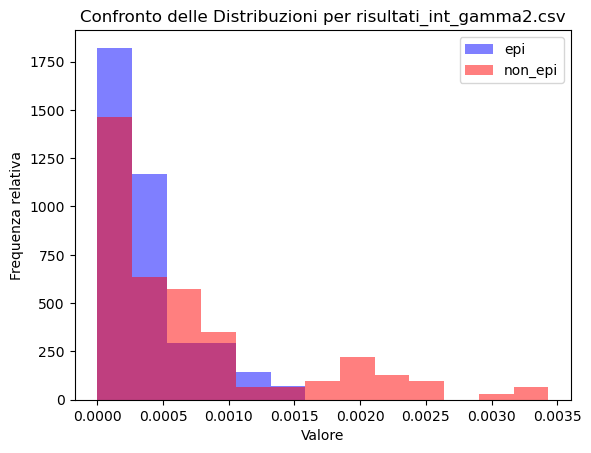

Statistica U normalizzata per risultati_int_gamma2.csv: 0.3994828700711054
P-value per risultati_int_gamma2.csv: 0.036901197707979436
Cohen's d per risultati_int_gamma2.csv: -0.5688912331225883
Numero di dati in risultati_int_gamma3.csv: 171


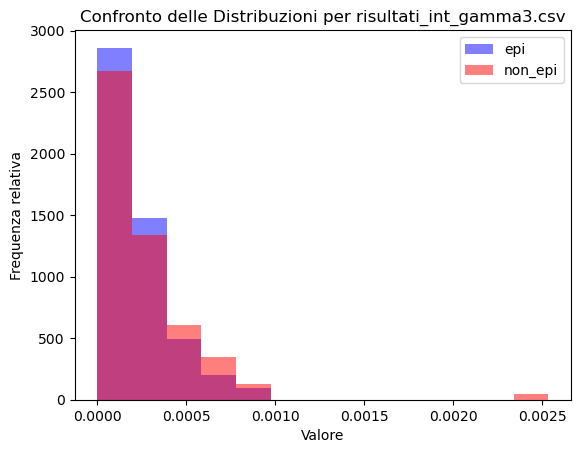

Statistica U normalizzata per risultati_int_gamma3.csv: 0.4888493859082094
P-value per risultati_int_gamma3.csv: 0.8180860154634781
Cohen's d per risultati_int_gamma3.csv: -0.14370283658504251
Numero di dati in risultati_int_gamma4.csv: 171


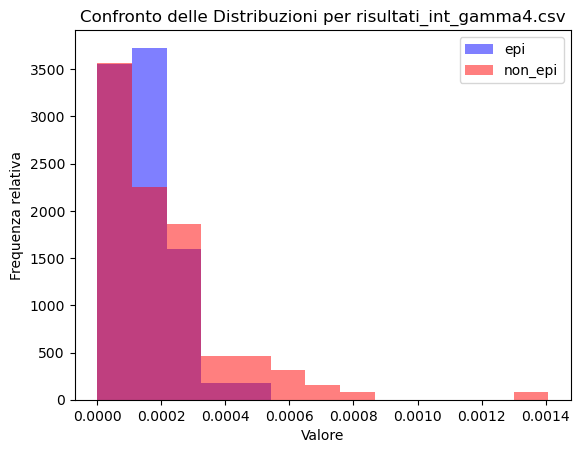

Statistica U normalizzata per risultati_int_gamma4.csv: 0.4410148674854557
P-value per risultati_int_gamma4.csv: 0.22098692880105097
Cohen's d per risultati_int_gamma4.csv: -0.3864431456932599
Numero di dati in risultati_int_teta.csv: 171


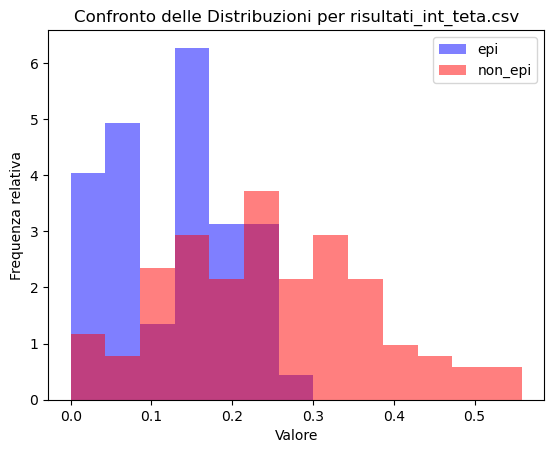

Statistica U normalizzata per risultati_int_teta.csv: 0.20798319327731093
P-value per risultati_int_teta.csv: 1.3128558624342336e-09
Cohen's d per risultati_int_teta.csv: -1.2083269727499006


In [22]:
# Lista dei file da confrontare
file_names = [
    'risultati_int_alpha.csv',
    'risultati_int_beta.csv',
    'risultati_int_delta.csv',
    'risultati_int_gamma1.csv',
    'risultati_int_gamma2.csv',
    'risultati_int_gamma3.csv',
    'risultati_int_gamma4.csv',
    'risultati_int_teta.csv'
]

# Funzione per caricare i dati e calcolare le statistiche
def process_files(file_name):
    df1 = pd.read_csv(f'risultati_int_welch_epi/{file_name}')
    df2 = pd.read_csv(f'risultati_int_welch_non_epi/{file_name[:-4]}_N.csv')

    data1 = df1.iloc[:, 1].values
    data2 = df2.iloc[:, 1].values

    print(f"Numero di dati in {file_name}: {len(data1) + len(data2)}")

    valore_massimo = max(data1)
    valore_massimo2 = max(data2)
    ran = max(valore_massimo, valore_massimo2)

    bins = int(math.sqrt(len(data1) + len(data2)))

    counts1, bin_edges1 = np.histogram(data1, bins=bins, range=(0, ran), density=True)
    counts2, bin_edges2 = np.histogram(data2, bins=bins, range=(0, ran), density=True)

    plt.hist(data1, bins=bins, range=(0, ran), density=True, alpha=0.5, label='epi', color='blue')
    plt.hist(data2, bins=bins, range=(0, ran), density=True, alpha=0.5, label='non_epi', color='red')
    plt.xlabel('Valore')
    plt.ylabel('Frequenza relativa')
    plt.title(f'Confronto delle Distribuzioni per {file_name}')
    plt.legend(loc='upper right')
    plt.show()

    u_statistic, p_value = mannwhitneyu(data1, data2)
    u_statistic_normalized = u_statistic / (len(data1) * len(data2))

    print(f"Statistica U normalizzata per {file_name}: {u_statistic_normalized}")
    print(f"P-value per {file_name}: {p_value}")

    mean1, mean2 = np.mean(data1), np.mean(data2)
    std1, std2 = np.std(data1), np.std(data2)
    cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)

    print(f"Cohen's d per {file_name}: {cohen_d}")

# Esegui il processo per ogni file
for file_name in file_names:
    process_files(file_name)


Numero di dati in risultati_int_alpha.csv: 171


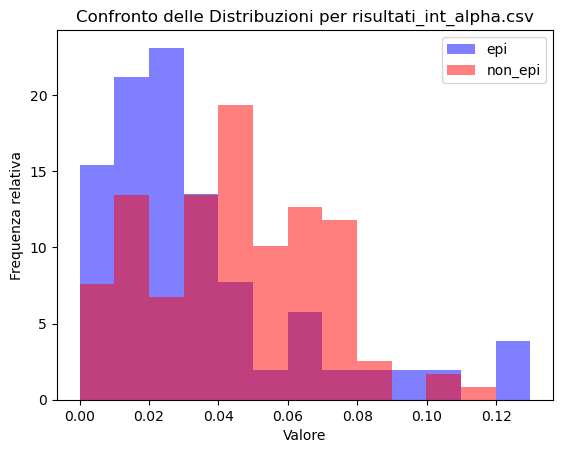

Statistica U normalizzata per risultati_int_alpha.csv: 0.3456690368455074
P-value per risultati_int_alpha.csv: 0.0013506543818201093
Cohen's d per risultati_int_alpha.csv: -0.3707167559995372
Numero di dati in risultati_int_beta.csv: 171


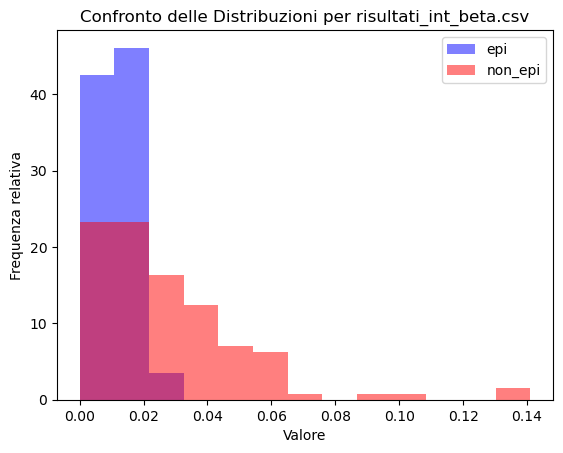

Statistica U normalizzata per risultati_int_beta.csv: 0.2676147382029735
P-value per risultati_int_beta.csv: 1.3874590581654065e-06
Cohen's d per risultati_int_beta.csv: -0.913140114530411
Numero di dati in risultati_int_delta.csv: 171


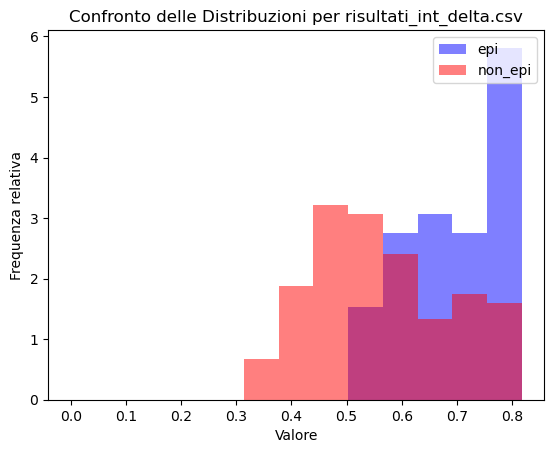

Statistica U normalizzata per risultati_int_delta.csv: 0.8017129928894635
P-value per risultati_int_delta.csv: 3.6740427959027995e-10
Cohen's d per risultati_int_delta.csv: 1.2467886088828968
Numero di dati in risultati_int_gamma1.csv: 171


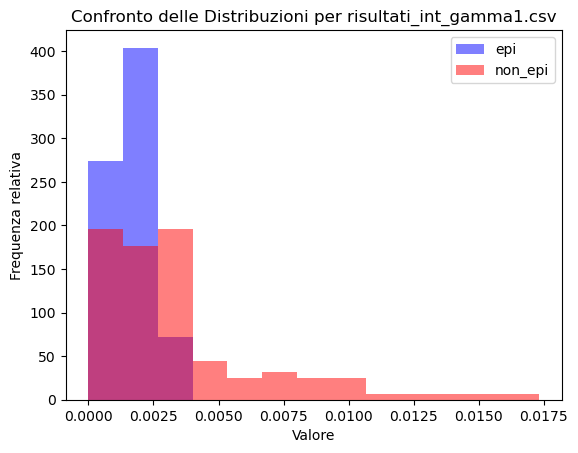

Statistica U normalizzata per risultati_int_gamma1.csv: 0.3096315449256626
P-value per risultati_int_gamma1.csv: 7.692713398986076e-05
Cohen's d per risultati_int_gamma1.csv: -0.8083009281155668
Numero di dati in risultati_int_gamma2.csv: 171


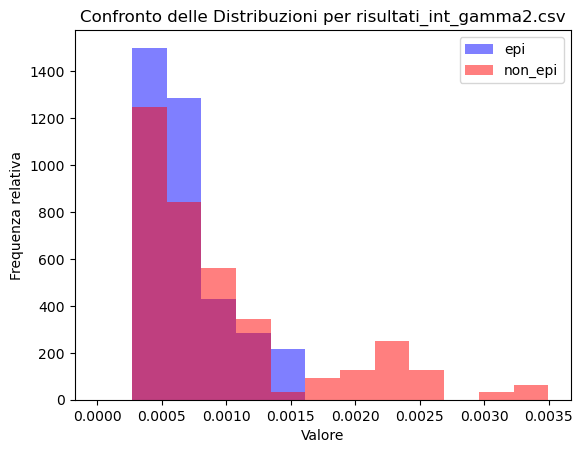

Statistica U normalizzata per risultati_int_gamma2.csv: 0.39819004524886875
P-value per risultati_int_gamma2.csv: 0.03453938692411457
Cohen's d per risultati_int_gamma2.csv: -0.5927670255742965
Numero di dati in risultati_int_gamma3.csv: 171


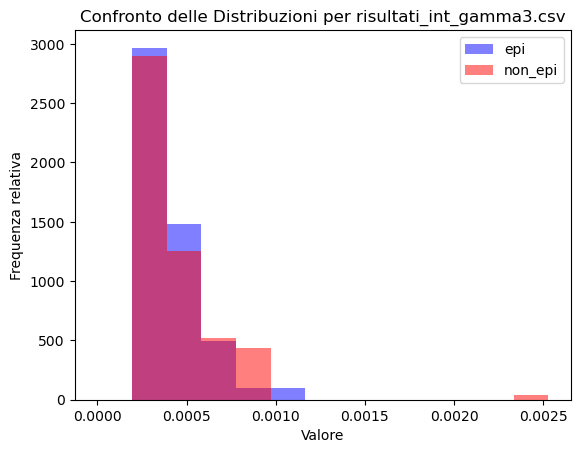

Statistica U normalizzata per risultati_int_gamma3.csv: 0.48626373626373626
P-value per risultati_int_gamma3.csv: 0.77661595156627
Cohen's d per risultati_int_gamma3.csv: -0.17735296012327104
Numero di dati in risultati_int_gamma4.csv: 171


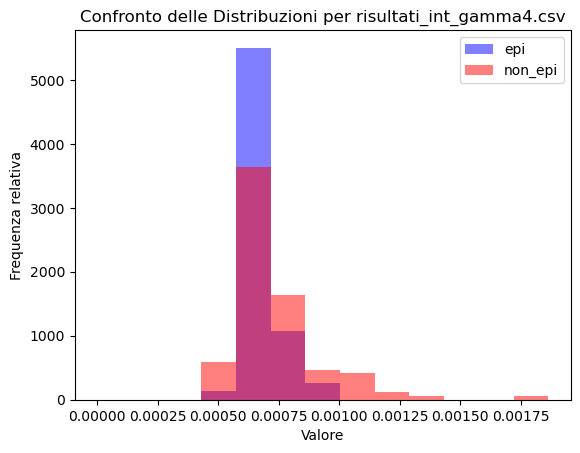

Statistica U normalizzata per risultati_int_gamma4.csv: 0.3926955397543633
P-value per risultati_int_gamma4.csv: 0.025888388361254438
Cohen's d per risultati_int_gamma4.csv: -0.5253609910953978
Numero di dati in risultati_int_teta.csv: 171


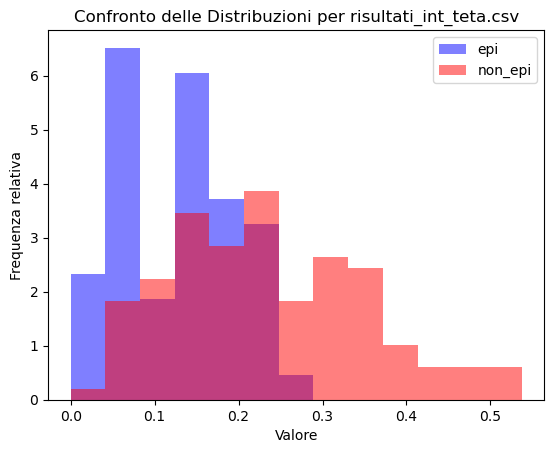

Statistica U normalizzata per risultati_int_teta.csv: 0.22042663219133807
P-value per risultati_int_teta.csv: 6.350073138792948e-09
Cohen's d per risultati_int_teta.csv: -1.1593602741750055


In [23]:
# Lista dei file da confrontare
file_names = [
    'risultati_int_alpha.csv',
    'risultati_int_beta.csv',
    'risultati_int_delta.csv',
    'risultati_int_gamma1.csv',
    'risultati_int_gamma2.csv',
    'risultati_int_gamma3.csv',
    'risultati_int_gamma4.csv',
    'risultati_int_teta.csv'
]

# Funzione per caricare i dati e calcolare le statistiche
def process_files(file_name):
    df1 = pd.read_csv(f'risultati_int_epi/{file_name}')
    df2 = pd.read_csv(f'risultati_int_non_epi/{file_name[:-4]}_N.csv')

    data1 = df1.iloc[:, 1].values
    data2 = df2.iloc[:, 1].values

    print(f"Numero di dati in {file_name}: {len(data1) + len(data2)}")

    valore_massimo = max(data1)
    valore_massimo2 = max(data2)
    ran = max(valore_massimo, valore_massimo2)

    bins = int(math.sqrt(len(data1) + len(data2)))

    counts1, bin_edges1 = np.histogram(data1, bins=bins, range=(0, ran), density=True)
    counts2, bin_edges2 = np.histogram(data2, bins=bins, range=(0, ran), density=True)

    plt.hist(data1, bins=bins, range=(0, ran), density=True, alpha=0.5, label='epi', color='blue')
    plt.hist(data2, bins=bins, range=(0, ran), density=True, alpha=0.5, label='non_epi', color='red')
    plt.xlabel('Valore')
    plt.ylabel('Frequenza relativa')
    plt.title(f'Confronto delle Distribuzioni per {file_name}')
    plt.legend(loc='upper right')
    plt.show()

    u_statistic, p_value = mannwhitneyu(data1, data2)
    u_statistic_normalized = u_statistic / (len(data1) * len(data2))

    print(f"Statistica U normalizzata per {file_name}: {u_statistic_normalized}")
    print(f"P-value per {file_name}: {p_value}")

    mean1, mean2 = np.mean(data1), np.mean(data2)
    std1, std2 = np.std(data1), np.std(data2)
    cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)

    print(f"Cohen's d per {file_name}: {cohen_d}")

# Esegui il processo per ogni file
for file_name in file_names:
    process_files(file_name)


In [11]:
# Lista dei file da confrontare
file_names = [
    'risultati_int_alpha.csv',
    'risultati_int_beta.csv',
    'risultati_int_delta.csv',
    'risultati_int_gamma1.csv',
    'risultati_int_gamma2.csv',
    'risultati_int_gamma3.csv',
    'risultati_int_gamma4.csv',
    'risultati_int_teta.csv'
]

# Funzione per eseguire il test t di Student
def process_files(file_name, folder1, folder2, suffix=''):
    df1 = pd.read_csv(f'{folder1}/{file_name}')
    df2 = pd.read_csv(f'{folder2}/{file_name[:-4]}{suffix}.csv')

    data1 = df1.iloc[:, 1].values
    data2 = df2.iloc[:, 1].values

    #t_statistic, p_value = ttest_ind(data1, data2)

    print(f"File: {file_name}")
    #print("T-statistic:", t_statistic)
    #print("P-value:", p_value)

    #if p_value > 0.05:
        #print("Le differenze non sono significative.\n")
    #else:
        #print("Le differenze sono significative.\n")
    u_statistic, p_value = mannwhitneyu(data1, data2)
    u_statistic_normalized = u_statistic / (len(data1) * len(data2))

    print(f"Statistica U normalizzata per {file_name}: {u_statistic_normalized}")
    print(f"P-value per {file_name}: {p_value}")
    if p_value > 0.05:
        print("Le differenze non sono significative.\n")
    else:
        print("Le differenze sono significative.\n")
    return {
        "File": file_name,
        "U_statistic_normalized": u_statistic_normalized,
        "P_value": p_value,
        "Significative": "No" if u_statistic_normalized > 0.30 and u_statistic_normalized < 0.70  else "Yes"
    }

# Esegui il processo per ogni file nelle cartelle 'risultati_int_welch_epi' e 'risultati_int_epi'
#print("Confronto tra 'risultati_int_welch_epi' e 'risultati_int_epi':")
#for file_name in file_names:
    #process_files(file_name, 'risultati_int_epi', 'risultati_int_non_epi')

results = []
for file_name in file_names:
    result = process_files(file_name, 'risultati_int_epi', 'risultati_int_non_epi', suffix='_N')
    results.append(result)

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Print the results table
print(results_df)

# Esegui il processo per ogni file nelle cartelle 'risultati_int_welch_non_epi' e 'risultati_int_non_epi' con il suffisso '_N'
#print("Confronto tra 'risultati_int_welch_non_epi' e 'risultati_int_non_epi':")
#for file_name in file_names:
    #process_files(file_name, 'risultati_int_welch_non_epi', 'risultati_int_non_epi', '_N')


File: risultati_int_alpha.csv
Statistica U normalizzata per risultati_int_alpha.csv: 0.3456690368455074
P-value per risultati_int_alpha.csv: 0.0013506543818201093
Le differenze sono significative.

File: risultati_int_beta.csv
Statistica U normalizzata per risultati_int_beta.csv: 0.2676147382029735
P-value per risultati_int_beta.csv: 1.3874590581654065e-06
Le differenze sono significative.

File: risultati_int_delta.csv
Statistica U normalizzata per risultati_int_delta.csv: 0.8017129928894635
P-value per risultati_int_delta.csv: 3.6740427959027995e-10
Le differenze sono significative.

File: risultati_int_gamma1.csv
Statistica U normalizzata per risultati_int_gamma1.csv: 0.3096315449256626
P-value per risultati_int_gamma1.csv: 7.692713398986076e-05
Le differenze sono significative.

File: risultati_int_gamma2.csv
Statistica U normalizzata per risultati_int_gamma2.csv: 0.39819004524886875
P-value per risultati_int_gamma2.csv: 0.03453938692411457
Le differenze sono significative.

File: 

In [10]:
# Lista dei file da confrontare
file_names = [
    'risultati_int_alpha.csv',
    'risultati_int_beta.csv',
    'risultati_int_delta.csv',
    'risultati_int_gamma1.csv',
    'risultati_int_gamma2.csv',
    'risultati_int_gamma3.csv',
    'risultati_int_gamma4.csv',
    'risultati_int_teta.csv'
]

# Funzione per eseguire il test t di Student
def process_files(file_name, folder1, folder2, suffix=''):
    df1 = pd.read_csv(f'{folder1}/{file_name[:-4]}{suffix}.csv')
    df2 = pd.read_csv(f'{folder2}/{file_name[:-4]}{suffix}.csv')

    data1 = df1.iloc[:, 1].values
    data2 = df2.iloc[:, 1].values

    print(f"File: {file_name}")
    
    u_statistic, p_value = mannwhitneyu(data1, data2)
    u_statistic_normalized = u_statistic / (len(data1) * len(data2))

    print(f"Statistica U normalizzata per {file_name}: {u_statistic_normalized}")
    print(f"P-value per {file_name}: {p_value}")
    if p_value > 0.05:
        print("Le differenze non sono significative.\n")
    else:
        print("Le differenze sono significative.\n")
    return {
        "File": file_name,
        "U_statistic_normalized": u_statistic_normalized,
        "P_value": p_value,
        "Significative": "No" if u_statistic_normalized > 0.30 and u_statistic_normalized < 0.70  else "Yes"
    }

# Esegui il processo per ogni file nelle cartelle 'risultati_int_welch_epi' e 'risultati_int_epi'
print("Confronto tra 'risultati_int_welch_epi' e 'risultati_int_epi':")
results_epi = []
for file_name in file_names:
    epi=process_files(file_name, 'risultati_int_welch_epi', 'risultati_int_epi')
    results_epi.append(epi)
results_non_epi = []
# for file_name in file_names:
#     result = process_files(file_name, 'risultati_int_epi', 'risultati_int_non_epi', suffix='_N')
#     results.append(result)

# Create a DataFrame to display results
results_epi_df = pd.DataFrame(results_epi)

# Print the results table
print('Results for comparison between epileptic using welch method', results_epi_df)

# Esegui il processo per ogni file nelle cartelle 'risultati_int_welch_non_epi' e 'risultati_int_non_epi' con il suffisso '_N'
print("Confronto tra 'risultati_int_welch_non_epi' e 'risultati_int_non_epi':")
for file_name in file_names:
    non_epi=process_files(file_name, 'risultati_int_welch_non_epi', 'risultati_int_non_epi', '_N')
    results_non_epi.append(non_epi)

# Create a DataFrame to display results
results_non_epi_df = pd.DataFrame(results_non_epi)

# Print the results table
print('Results for comparison between not epileptic using welch method', results_non_epi_df)

Confronto tra 'risultati_int_welch_epi' e 'risultati_int_epi':
File: risultati_int_alpha.csv
Statistica U normalizzata per risultati_int_alpha.csv: 0.46153846153846156
P-value per risultati_int_alpha.csv: 0.5010282112511596
Le differenze non sono significative.

File: risultati_int_beta.csv
Statistica U normalizzata per risultati_int_beta.csv: 0.3953402366863905
P-value per risultati_int_beta.csv: 0.06627115273375384
Le differenze non sono significative.

File: risultati_int_delta.csv
Statistica U normalizzata per risultati_int_delta.csv: 0.6179733727810651
P-value per risultati_int_delta.csv: 0.03839358053710957
Le differenze sono significative.

File: risultati_int_gamma1.csv
Statistica U normalizzata per risultati_int_gamma1.csv: 0.23150887573964496
P-value per risultati_int_gamma1.csv: 2.3980572606356727e-06
Le differenze sono significative.

File: risultati_int_gamma2.csv
Statistica U normalizzata per risultati_int_gamma2.csv: 0.1952662721893491
P-value per risultati_int_gamma2.cs